Arrays, Shape, and Reshaping

In [ ]:
import numpy as np

a = np.array([[1,2,3,4],[8,9,12,14]]) #creates 2d array
print(a.ndim) #two dimentions
print(a.shape) # two by four
newa = a.reshape(-1) #returns a view of a that is 1D. Can also use .flatten
print(newa)

print(a)
print(a[0,1])
print("index of second column")
print(a[:,1]) #iterates through all rows and only chooses index 1 column
print(a[::3]) #goes through every third element (step = 3)



2
(2, 4)
[ 1  2  3  4  8  9 12 14]
[[ 1  2  3  4]
 [ 8  9 12 14]]
2
index of second column
[2 9]
[[1 2 3 4]]


Data types

In [ ]:
a = np.array(['a','b','c'])

print(a.dtype) #Prints the data type of array (string)

ia = np.array([1,2,3,4], dtype='S')
print(ia)
newa = ia.astype('i')
print(newa)

<U1
[b'1' b'2' b'3' b'4']
[1 2 3 4]


COPY and VIEW

In [ ]:
cop = np.array([5,6,7,8])
c = cop.copy()
cop[0] = 12 #This changes only cop and not c
print("COPY:")
print(cop)
print(c)
print(c.base) #returns none

view = np.array([32,21,19,4])
v = view.view()
view[3] = 100 #This changes both v and view
print("VIEW:")
print(view)
print(v)
print(v.base) #returns original

COPY:
[12  6  7  8]
[5 6 7 8]
None
VIEW:
[ 32  21  19 100]
[ 32  21  19 100]
[ 32  21  19 100]


Iterating 

In [ ]:
a = np.array([[1,2,3],[5,7,0]])
sa = np.array([['a','b','c'],['d','e','f']])

for i in np.nditer(a[:, ::2]): #works the same as nested forloops (I believe it is also faster?)
    print(i)
print()
for i in np.nditer(sa, flags=['buffered'], op_dtypes=['<U1']):
  print(i)
  
print()
for idx, i in np.ndenumerate(a):
  print(idx, i)

1
3
5
0

a
b
c
d
e
f

(0, 0) 1
(0, 1) 2
(0, 2) 3
(1, 0) 5
(1, 1) 7
(1, 2) 0


Joining, splitting, searching, and sorting



In [ ]:
a1 = np.array([[4,7,9],[10,13,8]])
a2 = np.array([[12,93,14],[30,13,84]])
ah = np.hstack((a1,a2)) #This is the same as concat on axis 1
av = np.vstack((a1,a2)) #stacks on verticle axis
ad = np.dstack((a1,a2)) #creates 2 arrays stacked on depth (takes first of each and second of each)
ac = np.concatenate((a1,a2),axis=1) #Simple joins them
print(ac)
print("---hstack---")
print(ah)
print("---vstack---")
print(av)
print("---dstack---")
print(ad)
sa = np.array([3,6,8,0,4,1])
la = np.array(['c','d','f','a'])
print("SPLITTING")
spl = np.array_split(sa,2) #splits array in half
print(spl[1]) #prints first half of split
print("SEARCHING")
x = np.where(sa%2==0)#Outputs instances of even numbers in sa
print(x) 
print("SORTING")
sort = np.sort(sa) #int array sorts low to high
alpha = np.sort(la) #string array will sort alphabetically
print(sort)
print(alpha)

[[ 4  7  9 12 93 14]
 [10 13  8 30 13 84]]
---hstack---
[[ 4  7  9 12 93 14]
 [10 13  8 30 13 84]]
---vstack---
[[ 4  7  9]
 [10 13  8]
 [12 93 14]
 [30 13 84]]
---dstack---
[[[ 4 12]
  [ 7 93]
  [ 9 14]]

 [[10 30]
  [13 13]
  [ 8 84]]]
SPLITTING
[0 4 1]
SEARCHING
(array([1, 2, 3, 4]),)
SORTING
[0 1 3 4 6 8]
['a' 'c' 'd' 'f']


Filter

In [ ]:
fa = np.array([6,8,9,10,11,26,43,92])

filter = [] #creates empty array to fill with true and false values

for i in fa: #iterates through elements in the array
  if i %2==0: #checks if element is even
    filter.append(True)  #adds true to empty array if it is even
  else:
    filter.append(False) #adds false if not

na = fa[filter] #filters through true and false values in original array

print(na)

[ 6  8 10 26 92]


Random

In [ ]:
from numpy import random as r

x = r.randint(100) #random int from 0-100
b = r.rand() #random float from 0-1
ba = r.rand(5) #random float array with 5 elements
a = r.randint(100,size=(2,5)) #random 2 by 4 array with ints from 0-100
c = r.choice([5,8,2,1], size=(2)) #chooses a random from given choices

print(x)
print(b)
print(ba)
print(a)
print(c)

3
0.34888747188899316
[0.72661729 0.70353453 0.55836283 0.64361467 0.77845225]
[[56 48 51 97 72]
 [73 41 66 89 51]]
[8 2]


Random Distribution and Permutations

In [ ]:
x = r.choice([4,3,6,9,0], p=[.1,.4,.3,.1,.1], size=(100)) #the p must equal one
#Will return an array of given size with given data distribution and values
print(x)
print('SHUFFLED')
r.shuffle(x) #Shuffles the elements around and changes the original (permutation would keep original)
print(x)

[0 4 6 3 3 6 6 4 6 4 6 0 6 3 4 6 3 3 6 6 4 3 3 3 6 0 3 3 4 9 6 3 3 9 3 6 6
 6 9 6 9 3 0 0 6 6 6 3 6 3 0 6 3 6 3 6 6 3 6 3 6 3 4 0 3 6 6 4 3 9 3 3 6 6
 3 6 3 6 6 3 6 6 9 3 3 3 6 6 0 0 3 0 3 3 9 6 3 4 6 4]
SHUFFLED
[3 9 3 3 6 4 6 6 3 4 3 0 3 3 6 3 4 6 6 6 6 6 3 0 0 4 0 6 3 3 6 0 6 6 3 3 3
 6 6 3 3 3 9 0 6 9 6 6 6 0 6 4 3 3 9 4 4 3 6 3 3 0 3 6 3 9 6 6 6 4 6 3 6 3
 6 3 0 4 3 6 3 3 9 6 6 6 3 3 0 3 6 6 9 6 3 3 6 4 6 6]


Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


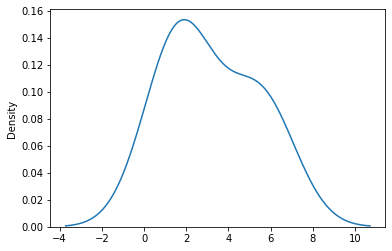

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot([2,5,6,1,2],hist=False) #Plots distribution of array without histogram
plt.show()

Types of Distribution

NORMAL
[[-2.0328548  -4.89303339  0.07370838]
 [ 2.13093793  3.04452303  0.87278584]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

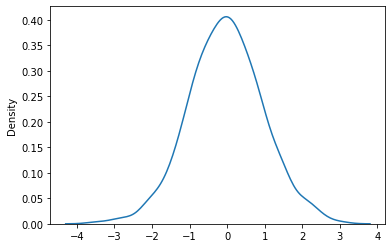

In [ ]:
print("NORMAL")
norm = r.normal(loc=1,scale=2,size=(2,3))
print(norm)
sns.distplot(r.normal(size=1000),hist=False) 
plt.show

BINOMIAL
[ 5  2  4  8  4  4  6  2  6  7  4  5  5  3  6  6  4  8  6  4  7  5  5  4
  6  4  2  9  3  5  5  5  5  5  3  4  6  6  6  4  6  6  7  1  6  5  5  3
  5  5  6  5  3  3  5  6  4  5  5  3  7  2  9  5  4  7  5  5  4  2  7  5
  7  6  4  4  7  8  3  7  6  3  9  4  7  5  6  5  7  6  2  6  5  5  5  4
  5  3  7  5  5  3  2  5  3  6  5  5  3  6  6  7  8  5  5  7  6  4  6  6
  4  7  4  3  5  6  5  4  3  6  4  4  4  5  4  5  7  5  6  6  7  4  3  5
  4  3  5  4  6  7  6  3  7  5  4  4  4  3  4  7  5  2  5  6  8  1  6  6
  6  3  5  6  6  4  5  1  6  6  5  4  4  6  4  7  3  5  5  5  5  5 10  4
  6  4  5  6  2  6  7  6  3  3  6  5  5  5  3  4  5  3  4  4  5  3  6  4
  4  6  9  3  6  2  4  5  4  7  6  8  7  6  5  6  7  3  5  4  5  7  4  8
  3  5  5  4  6  4  6  5  4  6  6  5  5  7  5  5  7  5  7  5  5  3  8  3
  5  7  4  5  7  4  3  6  5  4  6  2  4  7  4  6  5  4  3  6  6  6  6  6
  6  3  2  4  1  4  6  3  3  7  7  3  5  4  5  6  6  6  3  5  5  6  3  7
  4  5  9  5  5  5  6  3  8  6  5  6  6  3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

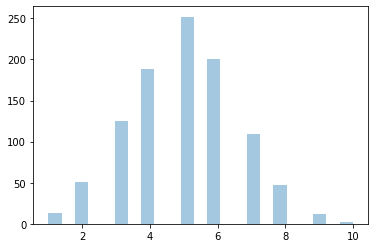

In [ ]:
print("BINOMIAL")
bi = r.binomial(n=10,p=.5,size=1000)
print(bi)
sns.distplot(bi,hist=True,kde=False)
plt.show

POISSON
[2 2 1 0 4 2 0 4 1 3 0 3 1 4 0 1 3 2 0 7 1 1 2 0 4 1 4 2 1 1 4 0 2 6 5 1 1
 3 2 0 1 2 1 2 1 2 0 2 1 4 2 3 0 3 2 2 1 3 1 2 1 1 3 1 4 2 2 0 0 4 1 3 3 1
 2 2 2 0 0 0 0 1 2 3 1 4 1 1 4 2 1 5 3 1 1 1 3 1 4 1 2 1 2 3 1 4 0 1 1 0 2
 2 0 2 2 2 1 1 1 2 2 3 1 1 1 1 2 2 3 2 1 4 3 1 1 2 2 0 2 1 3 3 4 0 4 4 2 5
 1 4 2 3 4 1 2 1 1 2 1 5 1 3 5 2 2 0 0 2 1 0 2 3 4 2 3 1 3 2 2 1 3 2 3 0 3
 1 1 3 4 0 3 3 2 0 5 3 0 0 2 1 0 1 2 1 3 2 1 4 2 3 0 1 2 4 1 1 1 2 0 1 4 2
 3 4 1 2 2 0 0 3 3 4 3 2 3 2 3 4 2 4 1 1 2 0 1 5 3 4 1 3 1 3 1 0 2 3 1 1 2
 0 2 3 1 0 3 1 1 2 1 0 2 3 1 1 3 0 1 3 5 2 4 0 6 1 3 2 1 3 1 0 3 3 3 1 2 2
 3 0 2 2 0 1 3 1 2 1 5 4 3 2 1 0 1 0 3 5 0 6 2 0 4 1 2 1 4 2 3 4 2 1 1 0 1
 3 0 3 3 4 2 1 0 4 1 2 1 4 3 5 3 2 4 3 1 1 1 0 1 4 2 0 2 0 0 2 2 2 2 2 1 2
 2 3 0 0 1 0 3 3 0 1 3 1 3 1 2 1 1 4 2 2 1 2 1 1 2 0 1 1 1 1 0 2 0 2 5 5 6
 3 1 2 0 1 1 1 1 2 1 1 3 1 3 2 1 1 0 1 4 4 2 1 1 3 1 2 0 2 4 1 2 6 0 0 2 3
 4 0 3 2 1 1 2 4 1 0 0 1 1 2 3 3 3 3 3 0 2 3 1 1 1 3 1 1 2 2 1 4 2 1 3 4 1
 2 1 1 0 2 1 3 4 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


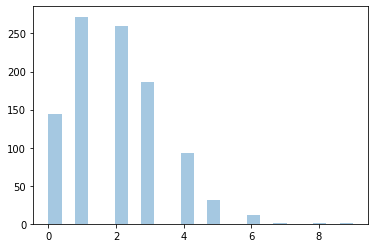

In [ ]:
print("POISSON")

poi = r.poisson(lam=2,size=1000)
print(poi)
sns.distplot(poi,kde=False)
plt.show()

UNIFORM
[2.99916502e-02 3.28679691e-01 4.92373838e-01 8.00749666e-01
 4.17470645e-01 4.45722566e-02 2.59146467e-01 6.55898592e-01
 6.41746633e-02 7.82945784e-01 3.83287373e-01 7.53382210e-01
 6.31398009e-01 2.64625840e-01 6.91222582e-01 2.33189189e-01
 7.28445128e-01 6.93716326e-01 8.46654619e-01 6.88799319e-02
 9.86281909e-01 8.56138299e-01 1.17160441e-01 5.47559832e-01
 7.43181063e-02 9.64029687e-01 6.11506407e-01 9.24505467e-02
 9.43803892e-01 2.17711178e-01 9.44693615e-02 2.14154009e-02
 3.33575392e-01 1.64414454e-01 9.32848642e-01 4.32157048e-01
 9.04709019e-01 9.95793130e-01 1.88927782e-01 3.02234392e-01
 5.47443569e-01 1.61024948e-01 1.60282908e-01 1.11522942e-01
 4.53774306e-02 3.28718558e-01 3.62298847e-01 5.71132070e-01
 4.92146910e-01 9.19123193e-02 5.86692066e-01 2.40654162e-01
 9.36755808e-01 2.03991274e-01 3.90714494e-02 7.25989856e-01
 5.93779163e-01 2.66355912e-01 7.17563569e-01 1.95761670e-01
 4.32292520e-01 3.12101693e-01 5.82671595e-01 8.06411044e-01
 2.52831321e-01 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


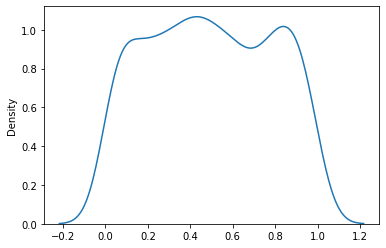

In [ ]:
print("UNIFORM")

uni = r.uniform(size=(1000))
print(uni)
sns.distplot(uni,hist=False)

LOGISTIC
[ 3.32128985e+00  4.44760525e+00  2.92918645e+00  7.82549763e-01
  1.35274316e+01  1.34461191e+00  4.22711671e+00 -5.07198423e-01
  6.48836254e+00 -1.01163196e+00 -3.85793782e+00 -2.52355122e+00
 -2.14575643e+00 -1.88360457e+00  1.00991822e+00  1.81575114e+00
  2.45067488e+00 -1.82434519e+00 -3.46096657e-02 -3.27936074e+00
  1.23913336e+00 -7.93568363e-01  9.67907685e-01 -7.25203143e+00
  5.92216855e-01  5.47412217e+00 -6.65366468e-01  3.25913724e+00
  6.47181148e+00 -2.39356460e+00 -3.58507862e+00 -1.07258670e+00
 -5.54915948e-02 -2.46710725e+00  8.44353993e-01 -5.71614349e+00
 -2.75444910e-02 -2.50727122e+00  4.34175082e+00  7.88814567e+00
 -8.65142957e-01  1.09577369e+00 -4.61250741e+00 -4.71379003e-01
  5.78502037e+00  2.42528861e+00 -4.28478755e+00  2.60595107e+00
 -2.58949619e+00  2.99740075e+00 -3.33427581e+00  9.25424628e+00
 -9.29626491e-01 -2.81258741e+00 -5.67563474e-02  3.54351623e+00
  2.34542421e+00 -8.57046302e-01 -8.36191846e-01 -4.45827969e+00
 -2.44922554e+00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


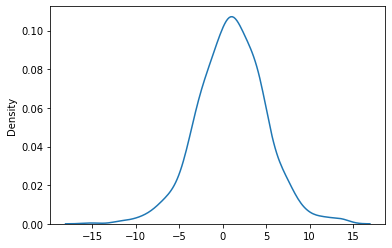

In [ ]:
print("LOGISTIC")

log = r.logistic(loc=1,scale=2,size=1000)
print(log)
sns.distplot(log,hist=False)


In [ ]:
print("MULTINOMIAL")
mult = r.multinomial(n=5,pvals=[1/6,1/6,1/6,1/6,1/6,1/6])
print(mult)

MULTINOMIAL
[1 0 2 1 0 1]


EXPONENTIAL
[3.34172512e+00 3.57742389e+00 3.15965047e+00 1.19166331e+00
 1.82523965e+00 2.30325816e+00 3.90884308e-01 3.23356153e-02
 1.11335879e+00 1.42347962e-01 1.72406740e+00 2.35204186e+00
 4.51688332e+00 4.11801094e-01 4.28342926e+00 8.50208609e-01
 3.62702630e+00 4.98965782e-02 8.55082470e-01 2.71960296e+00
 6.02532079e+00 1.08237031e+00 3.24773578e+00 3.55986154e+00
 3.25750559e+00 5.52506367e-01 9.89845601e-01 1.69581844e+00
 2.87339269e+00 3.75610214e+00 2.35413477e+00 2.55487054e+00
 2.10960403e-01 1.29896261e+00 9.88856039e+00 2.12723235e-01
 1.08447627e+00 4.16895588e-01 9.71946853e-01 9.12925776e-01
 1.13050700e+00 3.34318029e+00 1.85303411e+00 2.18686481e-01
 4.22979939e-02 1.35162059e+00 5.25554508e+00 6.95318273e-01
 5.19185427e-01 2.39052631e+00 5.81214552e+00 1.88791609e-01
 2.30128869e+00 5.45891288e-01 4.09082612e-01 3.96828155e+00
 1.19062668e+00 2.29687073e+00 2.99181739e+00 4.37000336e+00
 3.16019005e+00 5.86821874e-01 1.62178624e+00 8.34313783e-02
 4.99172990e

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


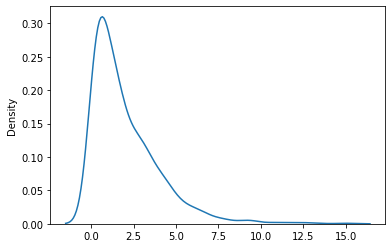

In [ ]:
print("EXPONENTIAL")

exp = r.exponential(scale=2,size=1000)
print(exp)
sns.distplot(exp,hist=False)

CHI SQUARE
[3.73989252e+00 1.34194268e+00 1.03507809e+00 2.37710184e+00
 3.27761011e+00 1.96246134e+00 4.71403391e-01 2.18073238e+00
 3.99026058e+00 2.89499154e+00 4.77783114e+00 7.30560188e-01
 1.67277992e+00 3.79445225e+00 5.61881533e-01 1.00405173e+00
 4.53462697e-02 5.61893929e-01 5.39915478e-01 3.84925457e-01
 1.37755268e+00 4.91624226e+00 3.08492378e+00 1.12880712e+00
 6.69151951e+00 1.35288157e+00 6.46859000e+00 1.52849655e+00
 1.32714136e+00 1.15450451e+00 1.13470122e-01 3.51392770e+00
 1.29007608e-01 6.24430457e-01 5.58634778e-01 2.20302913e+00
 2.15803566e+00 9.05916678e-01 1.57396869e+00 8.79303669e-01
 8.07361393e+00 1.22245800e+00 1.70443162e+00 2.13909679e+00
 2.76330298e+00 6.84308305e-01 2.20734852e+00 1.03429884e+00
 9.55223503e-01 1.72216121e-01 1.88978240e+00 3.23726780e+00
 1.62385299e+00 2.07045686e+00 1.48836712e+00 1.25632861e+00
 2.58112972e-01 9.32472785e-01 4.73147219e-01 5.75584256e-01
 5.23855364e+00 3.09630629e+00 9.88584482e+00 3.95296360e+00
 1.21301081e+

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


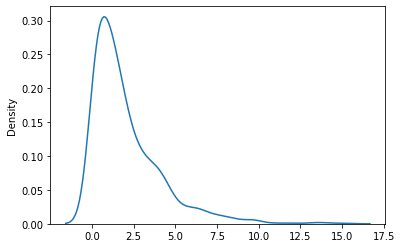

In [ ]:
print("CHI SQUARE")

chi = r.chisquare(df=2,size=1000)
print(chi)
sns.distplot(chi,hist=False);

Rayliegh
[2.36542539 8.01177821 4.03342032 0.98947012 4.66723128 1.24006719
 2.50878921 3.165315   0.89598977 2.16346612 2.46639921 3.10548739
 0.45769002 0.58498973 2.25795011 4.05953826 1.58827744 0.61101131
 2.8394966  3.13160201 5.16029251 3.10878099 1.96125107 3.65852239
 0.70279106 4.19565277 2.19169464 0.73234514 2.08926407 1.59653109
 4.72311221 1.97207112 0.35216538 4.1853192  3.53005139 0.83261447
 5.23249075 2.43693585 3.07133944 0.58211874 2.761863   1.88181159
 4.01261287 1.59227324 1.47382246 1.30367542 1.83656591 1.64391954
 1.20482799 0.41736137 4.43006296 3.45683095 4.8233471  3.52598528
 2.64848261 4.10868198 1.81120338 2.85614134 2.55654684 3.87433651
 0.31035505 5.44074019 3.93654912 2.53978793 4.51739427 1.25312517
 2.51335766 3.55471047 3.91815108 4.11296376 3.58463134 2.71890204
 4.14942279 1.05420645 0.64166301 0.21592027 4.22254801 3.19434074
 1.54227443 3.69583318 2.79929781 1.85747981 4.04891326 0.90231707
 3.06373105 3.40165854 0.46396475 1.79400764 2.680914

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


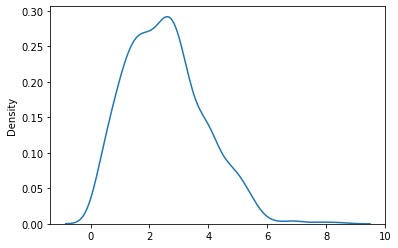

In [ ]:
print("Rayliegh")

ray = r.rayleigh(scale=2,size=1000)
print(ray)
sns.distplot(ray,hist=False)


Pareto
[2.67720290e-01 4.89998869e-01 2.01711275e+00 1.41249095e-01
 1.44405617e-01 5.41352771e-02 1.42897455e-01 3.59658897e-01
 8.50135648e-01 2.45956858e-01 2.81323649e-01 5.76485530e-02
 8.43552775e-01 3.27222265e-01 5.50449458e-02 1.61718696e-01
 3.22575166e-01 1.83325099e-01 4.46582176e-02 7.19249918e-01
 5.39029871e-01 1.42847553e+00 9.83298892e-01 3.62365826e+00
 1.40285077e+00 6.09716776e-01 5.31522305e-01 4.09583102e-02
 1.31649751e+00 8.76365276e-02 6.34546613e-01 1.54739725e+00
 2.38193216e-01 5.26161196e-01 1.65329171e+00 5.39819488e-01
 1.60738796e+00 6.55444519e-01 9.34032354e-01 1.08883150e+00
 7.41494510e-01 1.10922220e+00 3.46154322e-01 4.65351867e-01
 4.65073509e-02 1.04639111e+00 1.09755143e-01 2.94065931e-01
 1.91747187e-01 4.55047335e-01 3.29155458e-01 7.08359773e-02
 7.82666372e-02 5.88146528e-01 9.25424207e-03 2.38834419e-01
 8.92318960e+00 4.68180671e-01 3.32908693e-01 2.68433435e-01
 3.94299709e+00 8.65236061e-01 2.35310795e-01 1.05833215e+00
 1.80354648e-01 9

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


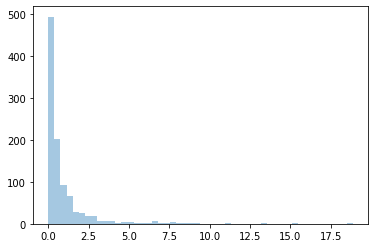

In [ ]:
print("Pareto")

par = r.pareto(a=2,size=1000)
print(par)
sns.distplot(par,kde=False)

ZIPF
[ 1  1  1  1  1  1 14  3  1  2  1  2  1  1  1  1  2  3  1  4  1  5  5  1
  2  2  1  1  1  1  1  1  3  3  1  8  4 16  1  2  1  1  1  1  1  4  4  1
  2  1 18  2  2  1  1  1  2  3  1 45  1  5  3  5  1  3  1  4  1  1  1  1
  3  1  4  1  1  1  3  2  1  1  1  1  3  1  1  2  1  1  1  1  1  1  2  1
 11  2  1  7]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


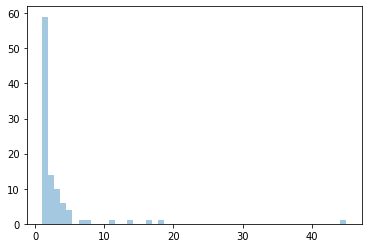

In [ ]:
print("ZIPF")

zipf = r.zipf(a=2,size=100)
print(zipf)
sns.distplot(zipf[x<10],kde=False)

Create Function

In [ ]:
def add(x,y): #defines add function as taking in and adding 2 numbers
  return x+y

add = np.frompyfunc(add,2,1) #turns add into a ufunc
print(add([9,2,2,4],[5,4,7,1])) #does add ufunc with numpy arrays
print(type(np.add)) #returns numpy.ufunc type

[14 6 9 5]
<class 'numpy.ufunc'>


Arithmatic and rounding

In [ ]:
a1 = np.array([10, 11, 12, 13, 14, 15])
a2 = np.array([20, 21, 22, 23, 24, 25])

add = np.add(a1,a2) #adds arrays
sub = np.subtract(a1,a2) #subtracts arrays
mult = np.multiply(a1,a2) #multiplies arrays
div = np.divide(a1,a2) #devides arrays
pow = np.power(a1,a2) #exponents arrays
rem = np.remainder(a1,a2)#gets the remainder of arrays
mod = np.divmod(a1,a2) #gets the mod of arrays
abs = np.absolute(a1) #adds absolute value of

print(add)
print(sub)
print(mult)
print(div)
print(pow)
print(rem)
print(mod)
print(abs)

trunc = np.trunc(div) #removes decimals and returns float closest to 0
around = np.around(div,2) #rounds to n decimals by >=5
floor = np.floor(div) #rounds to the lower whole number
ciel = np.ceil(div) #rounds to the higher whole number

print(trunc)
print(around)
print(floor)
print(ciel)

[30 32 34 36 38 40]
[-10 -10 -10 -10 -10 -10]
[200 231 264 299 336 375]
[0.5        0.52380952 0.54545455 0.56521739 0.58333333 0.6       ]
[ 7766279631452241920  3105570700629903195  5729018530666381312
 -4649523274362944347 -1849127232522420224  1824414961309619599]
[10 11 12 13 14 15]
(array([0, 0, 0, 0, 0, 0]), array([10, 11, 12, 13, 14, 15]))
[10 11 12 13 14 15]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0.5  0.52 0.55 0.57 0.58 0.6 ]
[0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1.]


Logs, Summations, products, and differences

In [ ]:
from math import log
print("LOGS")
nplog = np.frompyfunc(log,2,1)
ar = np.arange(1,10)
print(np.log2(ar)) # does a log at base 2 of both numbers
print(np.log(ar)) #does a natural log at base e
print(nplog(100,15)) #does a custom log at base n

print("SUMMATIONS")
a1 = np.array([98,15,9])
a2 = np.array([4,9,1])
add = np.add(a1,a2) #an array of added elements
sum = np.sum([a1,a2]) #the sum of the array pf added elements
axis = np.sum([a1,a2],axis=1) #The sum of the array of added elements over the first axis
cumsum = np.cumsum(a1) #partial addition of elements in the array
print(add)
print(sum)
print(axis)
print(cumsum)

print("PRODUCT")
prod = np.prod(a1) #the product of the elements in one array
tprod = np.prod([a1,a2]) #the product of the elements in both arrays
aprod = np.prod([a1,a2],axis=1) #the product of the elements in both arrays on axis 1
cprod = np.cumprod(a1) #the partial multiplication of elements in the array
print(prod)
print(tprod)
print(aprod)
print(cprod)

print("DIFFERENCE")
dif = np.diff(a1) #subtracts the two successive elements
ndif = np.diff(a1,n=2) #does discrete difference twice (n times)
print(dif)
print(ndif)

LOGS
[0.         1.         1.5849625  2.         2.32192809 2.5849625
 2.80735492 3.         3.169925  ]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458]
1.7005483074552052
SUMMATIONS
[102  24  10]
136
[122  14]
[ 98 113 122]
PRODUCT
13230
476280
[13230    36]
[   98  1470 13230]
DIFFERENCE
[-83  -6]
[77]


LCM and GCD

In [ ]:
n1 = 4
n2 = 6
a1 = np.array([3,6,9])

print("LCM")
nlcm = np.lcm(n1,n2) #finds the lowest common multiple of two numbers
alcm = np.lcm.reduce(a1) #finds the lowest common multiple in an array

print(nlcm)
print(alcm)

print("GCD")
ngcd = np.gcd(n1,n2) #finds the greatest common denomentator of two numbers
agcd = np.gcd.reduce(a1) #finds the greatest common denomentator in an array

print(ngcd)
print(agcd)

LCM
12
18
GCD
2
3


Trigonometic and Hyperbolic

In [ ]:
print("TRIGONOMETRIC")
sp = np.sin(np.pi/2) #gets sin of pi/2
a1 = np.array([90,180,270,360]) 
pa = np.array([np.pi/2, np.pi/3, np.pi/4, np.pi/5])
sa = np.sin(pa) #gets sin of array pa
rad = np.deg2rad(a1) #converts degrees to radians
arcs = np.arcsin(1.0) #gets arcsin of 1.0
hyp = np.hypot(3,4) #finds the hypotonuse given side a and b

print(sp)
print(sa)
print(rad)
print(arcs)
print(hyp)

print("HYPERBOLIC")
cosh = np.cosh(pa) #gets cosh of array pa
asinh = np.arcsinh(1.0) #gets arc sin h of 1.0

print(cosh)
print(asinh)

TRIGONOMETRIC
1.0
[1.         0.8660254  0.70710678 0.58778525]
[1.57079633 3.14159265 4.71238898 6.28318531]
1.5707963267948966
5.0
HYPERBOLIC
[2.50917848 1.60028686 1.32460909 1.20397209]
0.881373587019543


Set Operations

In [53]:
s1 = np.array([3,9,5,6]) #these arrays must have unique elements for set operations
s2 = np.array([20,40,28,99])

st = np.unique(s1) #creates unique set

inter = np.intersect1d(a1,a2,assume_unique=True) #finds values present in both arrays
uni = np.union1d(a1,a2) #finds unique values of 2 arrays
sdif = np.setdiff1d(s1,s2, assume_unique=True)  #finds the values present in s1 but not in s2
sym = np.setxor1d(s1,s2,assume_unique=True) #finds the values not present in both sets

print(st)
print(inter)
print(uni)
print(sdif)
print(sym)

[3 5 6 9]
[]
[10 11 12 13 14 15 20 21 22 23 24 25]
[3 9 5 6]
[ 3  5  6  9 20 28 40 99]
